# chipotle dataset 기초정보 출력

In [1]:
import pandas as pd

file_path = r'C:\Users\naye6\이것이 데이터 분석이다\python-data-analysis-master\data\chipotle.tsv'

#read_csv()함수로 데이터를 df 형태로 불러옴
chipo = pd.read_csv(file_path, sep='\t')

print(chipo.shape)
print("-"*30)
print(chipo.info())

(4622, 5)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
# chipo df에서 순서대로 10개의 데이터 확인

chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
# columns, index : 행, 열의 정보 출력
print(chipo.columns)
print('-'*30)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [4]:
# order_id : 숫자의 의미를 가지지 않기 때문에 str으로 변환

chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


In [5]:
# unique( ) 함수로 범주형 피처의 개수 출력

print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


# 인사이트의 발견 : 탐색과 시각화

## 가장 많이 주문한 아이템 TOP10

In [6]:
item_count = chipo['item_name'].value_counts()[:10]

# 순서대로 출력
for idx, (item, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top {} : {}, {}'.format(idx, item, cnt))

Top 1 : Chicken Bowl, 726
Top 2 : Chicken Burrito, 553
Top 3 : Chips and Guacamole, 479
Top 4 : Steak Burrito, 368
Top 5 : Canned Soft Drink, 301
Top 6 : Chips, 211
Top 7 : Steak Bowl, 211
Top 8 : Bottled Water, 162
Top 9 : Chicken Soft Tacos, 115
Top 10 : Chips and Fresh Tomato Salsa, 110


In [7]:
## 아이템별 주문 개수와 총량

order_count = chipo.groupby('item_name')['order_id'].count()
item_quantity = chipo.groupby('item_name')['quantity'].sum()
print(order_count[:10])
print('-'*40)
print(item_quantity[:10])

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64
----------------------------------------
item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64


### 시각화


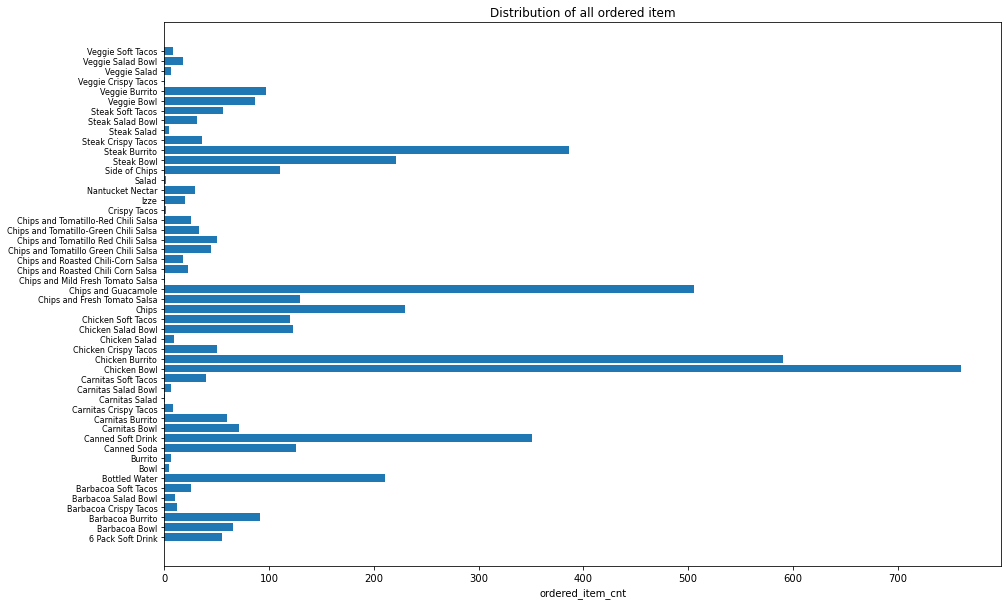

In [8]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = item_name_list
order_cnt = item_quantity.values.tolist()

plt.figure(figsize=(15,10))
plt.barh(x_pos, order_cnt)
plt.yticks(fontsize=8)
plt.xlabel('ordered_item_cnt')
plt.title('Distribution of all ordered item')


plt.show()

## value_counts(), unique()

In [9]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [10]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [11]:
chipo['item_name'].nunique()

50

In [12]:
chipo['item_name'].value_counts()[:20]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Chicken Salad Bowl              110
Canned Soda                     104
Side of Chips                   101
Veggie Burrito                   95
Barbacoa Burrito                 91
Veggie Bowl                      85
Carnitas Bowl                    68
Barbacoa Bowl                    66
Carnitas Burrito                 59
Steak Soft Tacos                 55
Name: item_name, dtype: int64

In [15]:
chipo['item_name'].value_counts(ascending=True)[:20]

Chips and Mild Fresh Tomato Salsa       1
Veggie Crispy Tacos                     1
Carnitas Salad                          1
Crispy Tacos                            2
Bowl                                    2
Salad                                   2
Steak Salad                             4
Carnitas Salad Bowl                     6
Burrito                                 6
Veggie Salad                            6
Carnitas Crispy Tacos                   7
Veggie Soft Tacos                       7
Chicken Salad                           9
Barbacoa Salad Bowl                    10
Barbacoa Crispy Tacos                  11
Chips and Roasted Chili-Corn Salsa     18
Veggie Salad Bowl                      18
Izze                                   20
Chips and Tomatillo-Red Chili Salsa    20
Chips and Roasted Chili Corn Salsa     22
Name: item_name, dtype: int64

# 데이터 전처리

In [16]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [17]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


* item_price type 변경

In [18]:
# coulmn단위 데이터에 apply() 함수로 전처리 적용

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


# 탐색적 데이터분석

In [26]:
# 주문당 평균 계산금액

chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [27]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [45]:
# 한 주문에 30달러 이상 주문한 id
# 5번 이상 주문한 id

chipo_orderid_group = chipo.groupby('order_id').sum()
order30_price = chipo_orderid_group[chipo_orderid_group.item_price >= 30]
order5_quntity = chipo_orderid_group[chipo_orderid_group.quantity >= 5]

print(order30_price[:20])
#print(order30_price.index.values)
#print(order30_price.count())
print("="*40)
print(order5_quntity[:20])
print(order5_quntity.count())


          quantity  item_price
order_id                      
1006             8       71.40
1010             5       33.24
1013             4       31.90
1016             3       32.25
1026             4       31.70
103              6       47.90
1035             4       32.04
1051             7       59.35
1052             4       38.20
1057             3       31.25
1070             4       33.70
1071             5       32.70
1082             3       32.25
1091             3       31.75
110              4       36.00
1167             6       33.20
1170             7       44.51
1176             4       43.14
1182             7       42.13
1189             3       31.25
          quantity  item_price
order_id                      
1006             8       71.40
1010             5       33.24
103              6       47.90
1051             7       59.35
1071             5       32.70
108              5       21.25
1097             6       29.60
1156             8       26.62
1167    

In [50]:
# 각 아이템의 가격을 계산

chipo_one_item = chipo[chipo.quantity == 1] #동일 아이템을 한 개만 주문한 주문 선별
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[:15]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


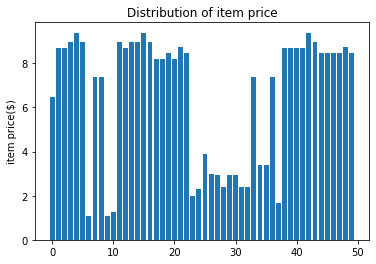

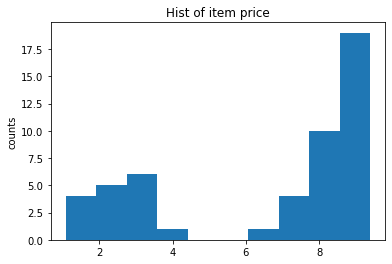

In [57]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

plt.hist(item_price)
plt.ylabel('counts')
plt.title("Hist of item price")
plt.show()

In [59]:
# 가장 비싼 주문에서 아이템이 총 몇개 팔렸는지

chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [61]:
# 특정 아이템이 볓 번 주문되었는지

# Veggie Salad Bowl이 몇 번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name']=='Veggie Salad Bowl']
chipo_salad = chipo_salad.drop_duplicates(['item_name','order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [69]:
# Chicken Bowl을 2번 이상 주문한 회수를구하려면 어떻게 해야할까

chipo_chicken = chipo[chipo['item_name'] =='Chicken Bowl']
chipo_chicken2 = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(len(chipo_chicken2))
print(chipo_chicken2[:10])

33
     order_id  quantity     item_name  \
4           2         2  Chicken Bowl   
154        70         2  Chicken Bowl   
282       124         2  Chicken Bowl   
409       178         3  Chicken Bowl   
415       181         2  Chicken Bowl   
654       271         2  Chicken Bowl   
976       401         2  Chicken Bowl   
1017      418         2  Chicken Bowl   
1106      457         2  Chicken Bowl   
1429      578         2  Chicken Bowl   

                                     choice_description  item_price  
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
154   [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       17.50  
282   [Fresh Tomato Salsa, [Rice, Black Beans, Chees...       17.50  
409   [[Fresh Tomato Salsa (Mild), Tomatillo-Green C...       32.94  
415                         [Tomatillo Red Chili Salsa]       17.50  
654   [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       17.50  
976   [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...